In [ ]:
!pip install pmapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.3/567.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 26.7 MB/s eta 0:00:00


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
from pmapper.pharmacophore import Pharmacophore as P
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from pprint import pprint

In [ ]:
file_path = "test.smi"

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the entire content of the file into a string
    file_contents = file.readlines()

st=Chem.MolFromSmiles(file_contents[0])
ms=[]                     #ms mein MolFromSmiles hai jo m mein the
for i in file_contents:
  ms.append(Chem.MolFromSmiles(i))

In [ ]:
# load a molecule from SMILES and generate 3D coordinates
mol = Chem.MolFromSmiles('C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O')  # talidomide
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, randomSeed=42)

# create pharmacophore
p = P()
p.load_from_mol(mol)



In [ ]:
# get 3D pharmacophore signature
sig = p.get_signature_md5()
print(sig)

b618dafbd277e360cecf05af6e529aa0


In [ ]:
sig = p.get_signature_md5(tol=5)
print(sig)

848841ce86be7ca791e1cfd0ff5a89ed


In [ ]:
from pmapper.utils import load_multi_conf_mol

# create multiple conformer molecule
AllChem.EmbedMultipleConfs(mol, numConfs=10, randomSeed=1024)

ps = load_multi_conf_mol(mol)

sig = [p.get_signature_md5() for p in ps]

pprint(sig)  # identical signatures occur

['cbe418e9a505118ecfaf21f07458244b',
 'f01985bdad09bd61c877ce66f00bc742',
 'f455d3cd4928efc3bc02a0b9b7cfb734',
 '05602aaaf47acec30e23b35a323846a5',
 'c11cbb7bcf5d75ed87f53efba52d3378',
 'dda56d3fa6a311e373dd2e37a3e62a28',
 'c11cbb7bcf5d75ed87f53efba52d3378',
 '7b894016d496ef95bb3ca5ca2858dc14',
 '4e28403e551c0580a06330a503f3f355',
 '158fcd0469c565a43f1a3a0851221175']


In [ ]:
from pmapper.utils import get_rms
for i in range(len(ps)):
    print("rmsd bewteen 2 and %i pharmacophore:" % i, round(get_rms(ps[2], ps[i]), 2))

rmsd bewteen 2 and 0 pharmacophore: 0.78
rmsd bewteen 2 and 1 pharmacophore: 0.09
rmsd bewteen 2 and 2 pharmacophore: 0.0
rmsd bewteen 2 and 3 pharmacophore: 0.43
rmsd bewteen 2 and 4 pharmacophore: 0.6
rmsd bewteen 2 and 5 pharmacophore: 0.47
rmsd bewteen 2 and 6 pharmacophore: 0.57
rmsd bewteen 2 and 7 pharmacophore: 0.53
rmsd bewteen 2 and 8 pharmacophore: 0.55
rmsd bewteen 2 and 9 pharmacophore: 0.71


In [ ]:
q = P()
q.load_from_feature_coords([('a', (3.17, -0.23, 0.24)), ('D', (-2.51, -1.28, -1.14))])
p.fit_model(q)

In [ ]:
# generate 3D pharmacophore fingerprint which takes into account stereoconfiguration
b = p.get_fp(min_features=4, max_features=4)

print(b)

{1666, 1415, 521, 1803, 1298, 1811, 1172, 1430, 407, 1815, 1951, 1314, 1198, 197, 70, 71, 584, 1870, 719, 976, 82, 88, 729, 1114, 614, 1128, 1770, 748, 110, 1136, 1009, 118, 249, 1531}


finding the similarity between 3d fingerprint

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
smiles1 = "N[C@@H](CS)C(O)=O"
mol1 = Chem.MolFromSmiles(smiles1)
mol1 = Chem.AddHs(mol1)
AllChem.EmbedMolecule(mol1)
fp1 = rdMolDescriptors.GetMorganFingerprint(mol1, 2, useFeatures=True)
# Example SMILES strings (replace with your SMILES)
for i in file_contents:

  smiles2 = i

  # Generate 3D conformers

  mol2 = Chem.MolFromSmiles(smiles2)

  mol2 = Chem.AddHs(mol2)

  AllChem.EmbedMolecule(mol2)
  # Generate 3D Morgan fingerprints from 3D conformers

  fp2 = rdMolDescriptors.GetMorganFingerprint(mol2, 2, useFeatures=True)

  # Compare fingerprints
  similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
  print(f"Tanimoto similarity between 3D conformers: {similarity}")


Tanimoto similarity between 3D conformers: 0.09375
Tanimoto similarity between 3D conformers: 0.07262569832402235
Tanimoto similarity between 3D conformers: 0.07262569832402235
Tanimoto similarity between 3D conformers: 0.09090909090909091
Tanimoto similarity between 3D conformers: 0.09090909090909091
Tanimoto similarity between 3D conformers: 0.1258741258741259
Tanimoto similarity between 3D conformers: 0.1258741258741259
Tanimoto similarity between 3D conformers: 0.07386363636363637
Tanimoto similarity between 3D conformers: 0.07386363636363637
Tanimoto similarity between 3D conformers: 0.09420289855072464
Tanimoto similarity between 3D conformers: 0.09420289855072464
Tanimoto similarity between 3D conformers: 0.09774436090225563
Tanimoto similarity between 3D conformers: 0.09774436090225563
Tanimoto similarity between 3D conformers: 0.08333333333333333
Tanimoto similarity between 3D conformers: 0.08333333333333333
Tanimoto similarity between 3D conformers: 0.14173228346456693
Tanimo

KeyboardInterrupt: 

finding positve/negative charge on smile

In [ ]:
from rdkit import Chem

# Function to check if a molecule is positively or negatively charged
def check_charge(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        total_charge = Chem.GetFormalCharge(mol)
        if total_charge > 0:
            return "Positive charge"
        elif total_charge < 0:
            return "Negative charge"
        else:
            return "Neutral"
    else:
        return "Invalid SMILES"

# Example usage:
for i in file_contents:
  smiles = i
  charge_status = check_charge(smiles)
  print(f"charge : {charge_status}")


charge : Neutral
charge : Neutral
charge : Neutral


finding aromatic ring in smile molecule

In [ ]:
from rdkit import Chem

# Function to check if a molecule contains aromatic rings
def check_aromaticity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return mol.GetSubstructMatches(Chem.MolFromSmarts("[a]"))
    else:
        return "Invalid SMILES"

# Example usage:
for i in file_contents:
  smiles = i  # Benzene
  has_aromatic_rings = check_aromaticity(smiles)
  if has_aromatic_rings:
      print(f"aromatic rings : yes")
  else:
      print(f"aromatic rings : NO")


aromatic rings : yes


hydrogen bond donor or acceptor


In [ ]:
# from rdkit import Chem

# # Function to identify hydrogen bond donors and acceptors in a molecule
# def identify_hbond_donor_acceptor(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     if mol is not None:
#         atom_properties = []
#         for atom in mol.GetAtoms():
#             # Check if the atom can act as a hydrogen bond donor
#             if atom.GetTotalNumHs() > 0 and atom.GetSymbol() != 'H':
#                 atom_properties.append(f"Atom {atom.GetIdx()} is a hydrogen bond donor.")
#             # Check if the atom can act as a hydrogen bond acceptor
#             if atom.GetTotalNumHs() == 0 and atom.GetImplicitValence() > atom.GetExplicitValence():
#                 atom_properties.append(f"Atom {atom.GetIdx()} is a hydrogen bond acceptor.")
#         return atom_properties
#     else:
#         return "Invalid SMILES"

# # Example usage:
# for i in file_contents:
#   smiles = i # Ethanol
#   hbond_properties = identify_hbond_donor_acceptor(smiles)
#   for prop in hbond_properties:
#       print(prop)
# # print(hbond_properties)


In [ ]:
from rdkit import Chem

# Function to identify potential hydrogen bond donors and acceptors in a molecule
def identify_hydrogen_bonding_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        hbond_donors = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetTotalNumHs() > 0 and atom.GetSymbol() != 'H']
        hbond_acceptors = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetTotalNumHs() == 0 or atom.GetImplicitValence() > atom.GetExplicitValence()]

        return {
            'Hydrogen Bond Donors': hbond_donors,
            'Hydrogen Bond Acceptors': hbond_acceptors
        }
    else:
        return "Invalid SMILES"

# Example usage:
# for i in file_contents:
smiles = "Oc1nc2ccc(Cl)cc2nc1O"  # Ethanol
hbond_properties = identify_hydrogen_bonding_atoms(smiles)
print(f"Hydrogen Bond Donors: {hbond_properties['Hydrogen Bond Donors']}")
print(f"Hydrogen Bond Acceptors: {hbond_properties['Hydrogen Bond Acceptors']}")


Hydrogen Bond Donors: [0, 4, 5, 8, 12]
Hydrogen Bond Acceptors: [1, 2, 3, 6, 7, 9, 10, 11]


hydrophobic region

In [ ]:
from rdkit import Chem

# Function to identify hydrophobic regions in a molecule
def find_hydrophobic_regions(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        hydrophobic_atoms = []

        # Identify atoms based on their properties (e.g., carbon atoms)
        for atom in mol.GetAtoms():
            if atom.GetAtomicNum() == 6 or atom.GetAtomicNum() == 35.5 or atom.GetAtomicNum() == 80 or atom.GetAtomicNum() == 127:  # Carbon atoms are generally part of hydrophobic regions
                hydrophobic_atoms.append(atom.GetIdx())

        return hydrophobic_atoms if hydrophobic_atoms else "No hydrophobic regions found"
    else:
        return "Invalid SMILES"

# Example usage:
for i in file_contents:
  smiles = i
  hydrophobic_atoms = find_hydrophobic_regions(smiles)
  if isinstance(hydrophobic_atoms, list):
      print(f"Indices of hydrophobic atoms in the molecule with SMILES '{smiles}': {hydrophobic_atoms}")
  else:
      print(hydrophobic_atoms)


Indices of hydrophobic atoms in the molecule with SMILES 'CC(=O)OC1=CC=CC=C1C(=O)O
': [0, 1, 4, 5, 6, 7, 8, 9, 10]
Indices of hydrophobic atoms in the molecule with SMILES 'CC(=O)Oc1ccccc1C(=O)O
': [0, 1, 4, 5, 6, 7, 8, 9, 10]
Indices of hydrophobic atoms in the molecule with SMILES 'OCC(O)C(O)C(O)C(O)CO': [1, 2, 4, 6, 8, 10]


fnctional group

In [ ]:
from rdkit import Chem

# Function to identify functional groups in a molecule
def find_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        functional_groups = []

        # Define SMARTS patterns for various functional groups
        functional_group_patterns = {
            'Alcohol': '[OX2H]',
            'Carboxylic Acid': '[CX3](=O)[OX2H1]',
            'Amine': '[NX3;H2,H1;!$(NC=O)]',
            'Halogen':'[F]',
            'Halogen':'[Cl]',
            'Halogen':'[Br]'
            # Add more SMARTS patterns for other functional groups as needed
        }

        for group, pattern in functional_group_patterns.items():
            substructure = Chem.MolFromSmarts(pattern)
            matches = mol.GetSubstructMatches(substructure)
            if matches:
                functional_groups.append(group)

        return functional_groups if functional_groups else "No functional groups found"
    else:
        return "Invalid SMILES"

# Example usage:
for i in file_contents:
  smiles = i
  functional_groups = find_functional_groups(smiles)
  if isinstance(functional_groups, list):
      print(f"Functional groups in the molecule with SMILES '{smiles}': {', '.join(functional_groups)}")
  else:
      print(functional_groups)


Functional groups in the molecule with SMILES 'c1ccccc1Br': Halogen


printing the image of the smile(compund)

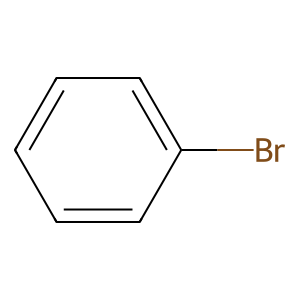

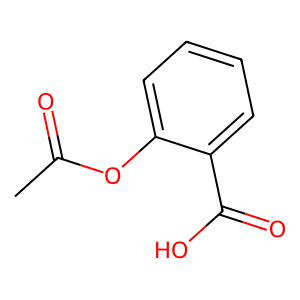

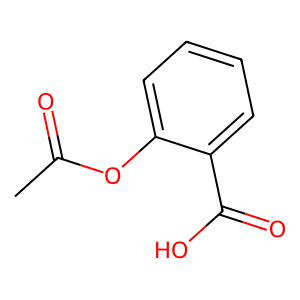

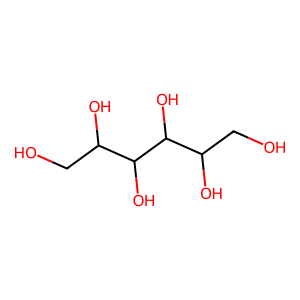

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# List of SMILES strings

smiles_list = ["c1ccccc1Br"]
for i in file_contents:
  smiles_list.append(i)

# Function to draw molecules from SMILES and display them
def draw_molecules(smiles_list):
    molecule_images = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            molecule_images.append(Draw.MolToImage(mol))
        else:
            molecule_images.append(f"Invalid SMILES: {smiles}")
    return molecule_images

# Example usage:
images = draw_molecules(smiles_list)
for image in images:
    if isinstance(image, str):
        print(image)
    else:
        display(image)  # Display the molecule structures


In [ ]:
from rdkit import Chem

def count_hbond_donors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES string"

    # Count hydrogen bond donors
    donors = sum(1 for atom in mol.GetAtoms() if atom.GetTotalNumHs() > 0 and (atom.GetAtomicNum() == 7 or atom.GetAtomicNum() == 8))
    return donors

# Example SMILES string
for i in file_contents:
  smiles = i  # Replace this with any SMILES string

  donors_count= count_hbond_donors(smiles)
  print(f"Number of hydrogen bond donors: {donors_count}")


Number of hydrogen bond donors: 1
Number of hydrogen bond donors: 1
Number of hydrogen bond donors: 6


In [ ]:
from rdkit import Chem

def count_hbond_acceptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES string"

    # Count hydrogen bond acceptors, considering case sensitivity
    acceptors = sum(1 for atom in mol.GetAtoms() if (atom.GetSymbol() in ['N', 'O','Cl','F']) and (atom.GetTotalDegree() < 4))

    return acceptors

# Example SMILES string
for i in file_contents:
  example_smiles = i  # Replace this with any SMILES string

  acceptors_count = count_hbond_acceptors(example_smiles)
  print(f"Number of hydrogen bond acceptors: {acceptors_count}")


Number of hydrogen bond acceptors: 4
Number of hydrogen bond acceptors: 4
Number of hydrogen bond acceptors: 6


In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/pubchem/Compound/CURRENT-Full/SDF/Compound_170500001_171000000.sdf.gz

--2024-04-10 13:16:13--  https://ftp.ncbi.nlm.nih.gov/pubchem/Compound/CURRENT-Full/SDF/Compound_170500001_171000000.sdf.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519585124 (496M) [application/x-gzip]
Saving to: ‘Compound_170500001_171000000.sdf.gz’

Compound_170500001_ 100%[===================>] 495.51M  13.7MB/s    in 29s     

2024-04-10 13:16:43 (17.2 MB/s) - ‘Compound_170500001_171000000.sdf.gz’ saved [519585124/519585124]



In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/pubchem/Compound/CURRENT-Full/SDF/Compound_125000001_125500000.sdf.gz

--2024-04-10 13:18:30--  https://ftp.ncbi.nlm.nih.gov/pubchem/Compound/CURRENT-Full/SDF/Compound_125000001_125500000.sdf.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177044026 (169M) [application/x-gzip]
Saving to: ‘Compound_125000001_125500000.sdf.gz’

Compound_125000001_ 100%[===================>] 168.84M  28.1MB/s    in 6.4s    

2024-04-10 13:18:36 (26.4 MB/s) - ‘Compound_125000001_125500000.sdf.gz’ saved [177044026/177044026]



In [ ]:
!gunzip Compound_125000001_125500000.sdf.gz

In [ ]:
import pandas as pd

In [ ]:
!pip install pubchempy


  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=ba2a43ca7abb40ca429cc19805ce61df81b15374a8431c202dd0c5f9421bdae8
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [ ]:
!pip install chembl_webresource_client


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/Compound_170500001_171000000.sdf')
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 107, saw 6


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
#from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import glob
import tqdm
import numpy as np
import pandas as pd
from tqdm import tqdm
import pubchempy as pcp
from pubchempy import *
from rdkit.Chem.PandasTools import LoadSDF
from rdkit.Chem import (
  PandasTools,
  Draw,
  Descriptors,
  rdFingerprintGenerator,
)
import pandas as pd
from tqdm import tqdm
from chembl_webresource_client.new_client import new_client

In [ ]:
df = LoadSDF('/content/Compound_125000001_125500000.sdf')

[13:21:40] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 12 ignored
[13:21:40] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 12 ignored
[13:21:40] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 12 ignored
[13:21:40] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 12 ignored
[13:21:54] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 11 ignored
[13:21:54] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 11 ignored
[13:21:54] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 11 ignored
[13:21:54] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 11 ignored
[13:22:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 1 ignored
[13:22:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 2 ignored
[13:22:03] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 3

In [ ]:
df.to_csv('10_april.csv')